In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [3]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [4]:
dataset_name = "W13_only"

In [5]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

BES_Panel (31197, 312)
BES_numeric (31197, 299)
var_type (312, 13)
BES_non_numeric (31197, 11)
BES_reduced (31197, 304)
BES_reduced_with_na (31197, 304)
Wall time: 3.45 s


In [6]:
# likeCorbyn, likeMay, 

BES_Panel["al5"].isnull().sum()

# 

0

In [7]:
BES_Panel["likeCorbyn"].value_counts()

Strongly dislike    7303
Strongly like       3345
7                   3022
8                   2989
5                   2505
6                   2149
9                   1832
3                   1740
2                   1709
1                   1682
4                   1526
Don't know          1395
Name: likeCorbyn, dtype: int64

In [8]:
al_scale_manual_with_na = BES_Panel[["al1","al2","al3","al4","al5"]].apply(lambda x:x.cat.codes).replace(-1,np.nan).replace(5,np.nan)
al_scale_manual = al_scale_manual_with_na.fillna(al_scale_manual_with_na.mean().round()).sum(axis=1)

In [9]:
lr_scale_manual_with_na = BES_Panel[["lr1","lr2","lr3","lr4","lr5"]].apply(lambda x:x.cat.codes).replace(-1,np.nan).replace(5,np.nan)
lr_scale_manual = lr_scale_manual_with_na.fillna(lr_scale_manual_with_na.mean().round()).sum(axis=1)

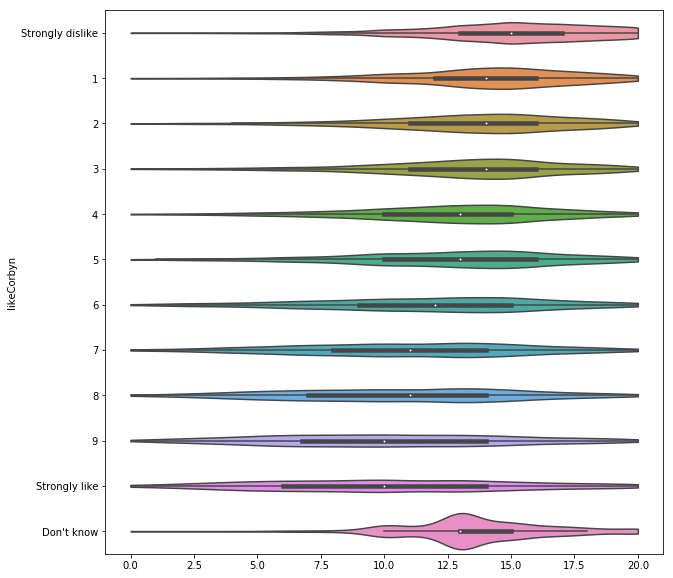

In [10]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=al_scale_manual, y=BES_Panel["likeCorbyn"],cut=0)

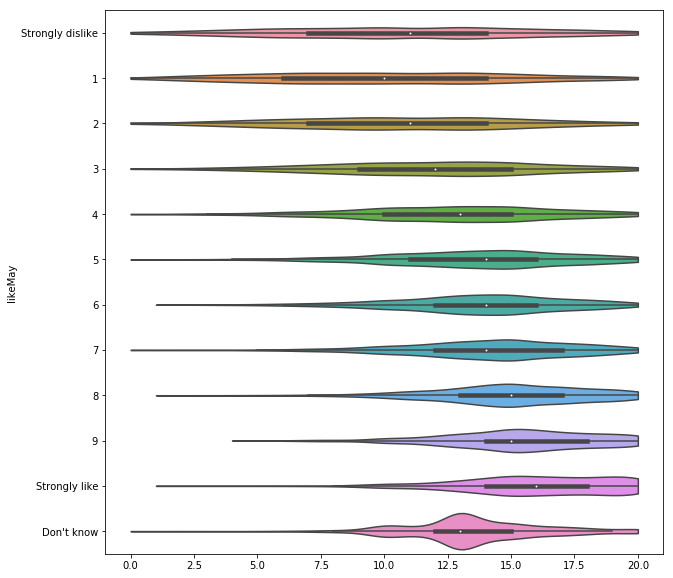

In [11]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=al_scale_manual, y=BES_Panel["likeMay"],cut=0)

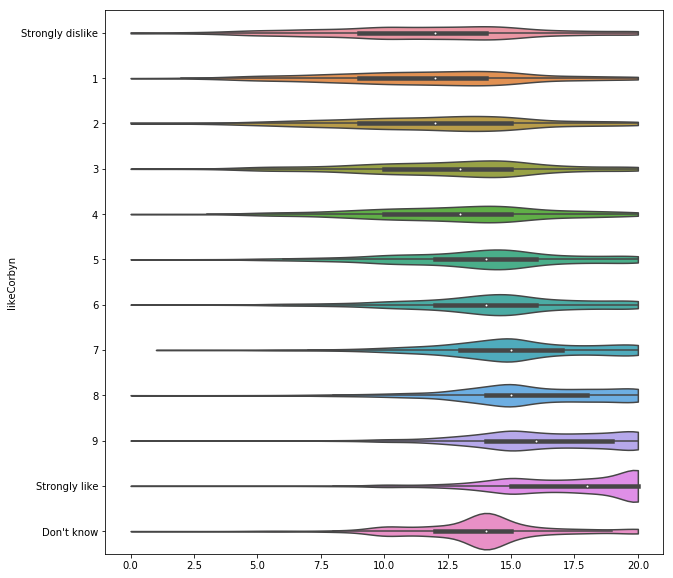

In [12]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=lr_scale_manual, y=BES_Panel["likeCorbyn"],cut=0)

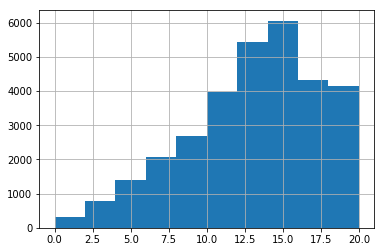

In [13]:
al_scale_manual.hist()

In [14]:
al_scale_manual_with_na.loc[8]

al1    0.0
al2    0.0
al3    0.0
al4    0.0
al5    1.0
Name: 8, dtype: float64

In [ ]:
BES_Panel[["al1","al2","al3","al4","al5"]].loc[65]

In [ ]:
BES_Panel["likeCorbyn"].cat.categories

In [ ]:
al_scale_manual

In [16]:
from scipy import stats
import matplotlib.pyplot as plt

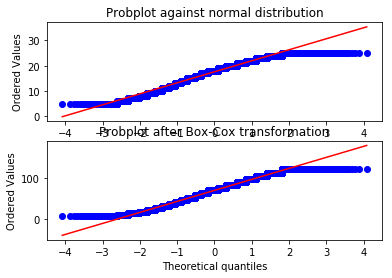

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(al_scale_manual.values+5, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(al_scale_manual.values+5)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [52]:
X,_ = stats.boxcox(al_scale_manual.values+5)

In [53]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(pd.DataFrame(X.T).values)
X_scaled

array([[-0.87558492],
       [ 0.25573988],
       [ 0.01180776],
       ...,
       [-0.44992832],
       [ 0.25573988],
       [-0.66736762]])

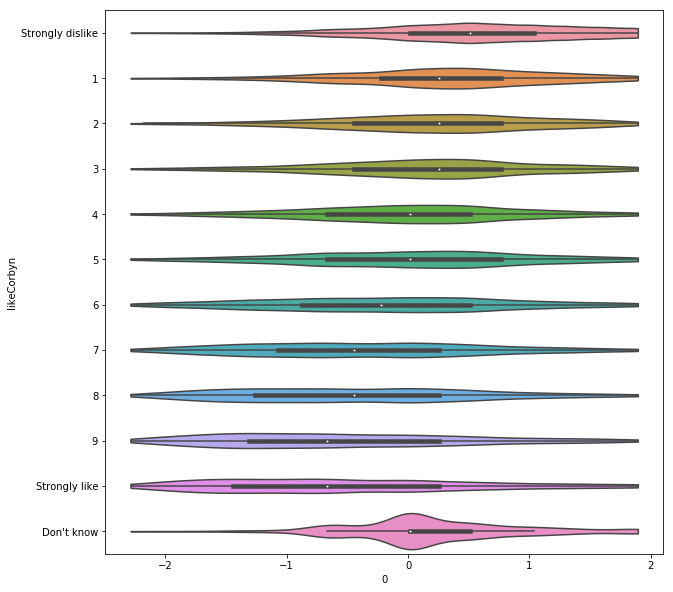

In [54]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=pd.DataFrame(X_scaled)[0], y=BES_Panel["likeCorbyn"],cut=0)

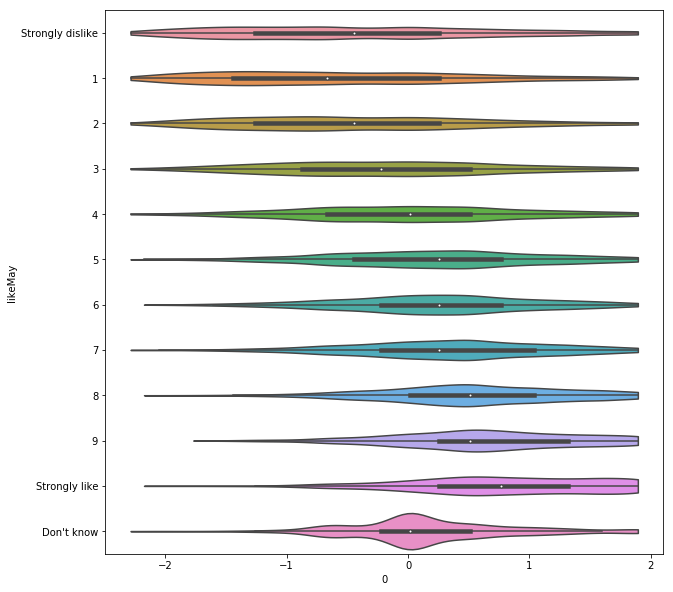

In [55]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=pd.DataFrame(X_scaled)[0], y=BES_Panel["likeMay"],cut=0)

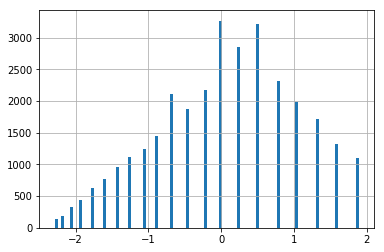

In [45]:
pd.DataFrame(X_scaled)[0].hist(bins=100)

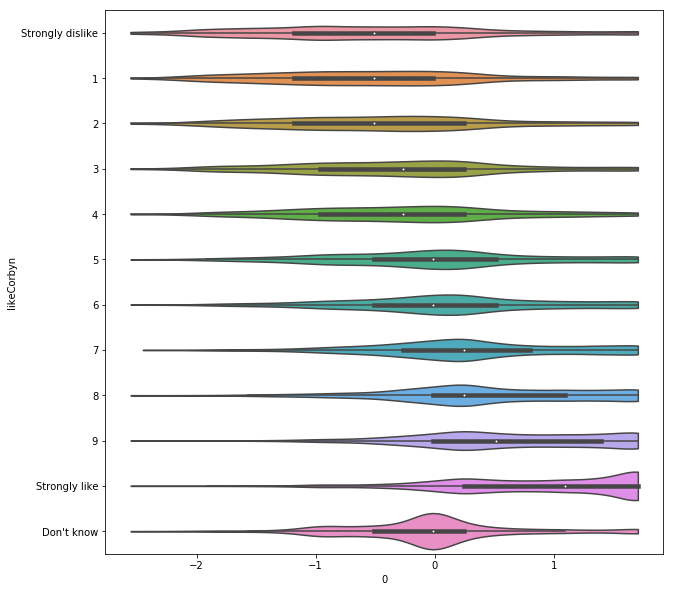

In [47]:
lr,_ = stats.boxcox(lr_scale_manual.values+5)
lr_scaled = StandardScaler().fit_transform(pd.DataFrame(lr.T).values)
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=pd.DataFrame(lr_scaled)[0], y=BES_Panel["likeCorbyn"],cut=0)

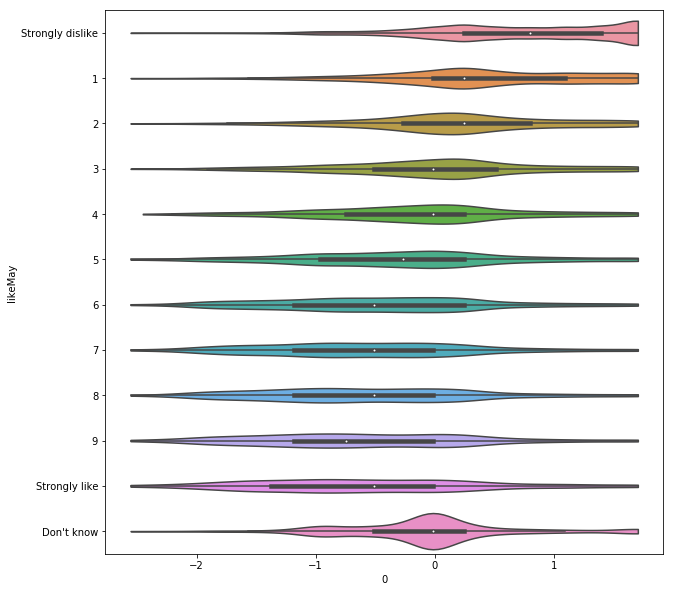

In [50]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=pd.DataFrame(lr_scaled)[0], y=BES_Panel["likeMay"],cut=0)

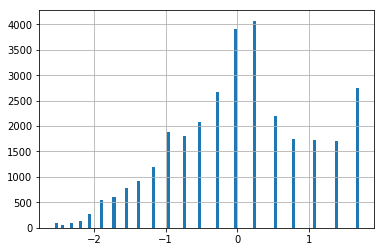

In [48]:
pd.DataFrame(lr_scaled)[0].hist(bins=100)

In [205]:
lr_axis_labels = list(reversed(BES_Panel["lr_scale"].cat.categories))
# lr_axis_labels

al_axis_labels = list(BES_Panel["al_scale"].cat.categories)
# al_axis_labels

y_axis_labels = list(BES_Panel["likeCorbyn"].cat.categories)
y_axis_labels.remove("Don't know")
# y_axis_labels

save_folder = BES_output_folder + "likeCorbyn&May_by_al&lr_scales" + os.sep
if not os.path.exists( save_folder ):
    os.makedirs( save_folder )

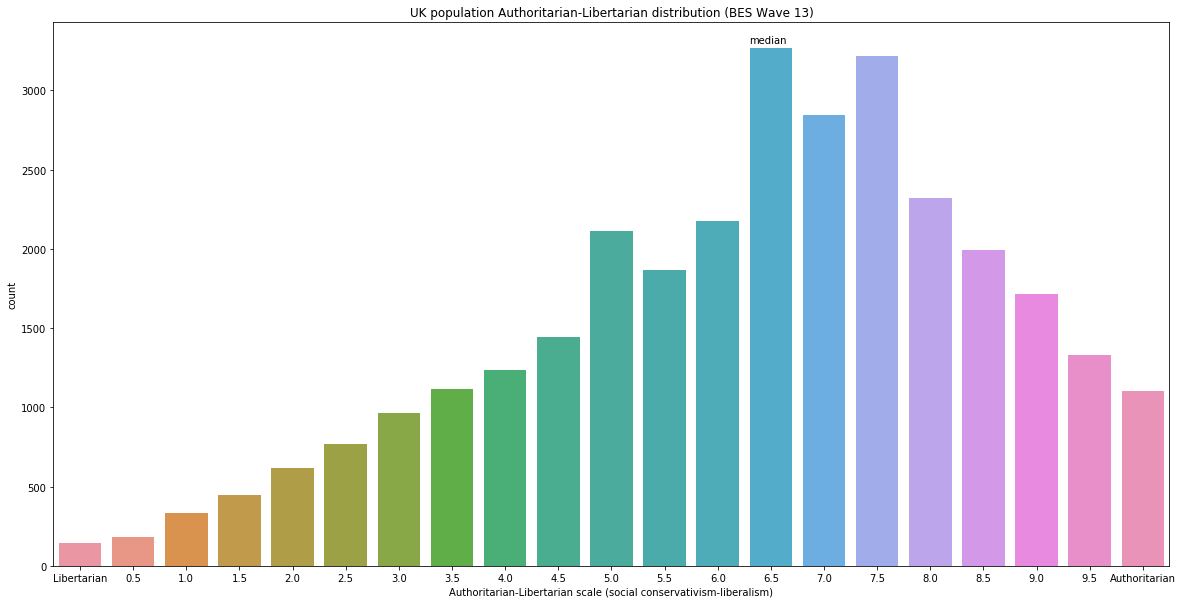

In [206]:
fig = plt.figure(figsize=(20,10))
data = al_scale_manual
sns.countplot(data)

# plt.vlines(data.mean(), 0,data.value_counts().max())
plt.text(data.median()-.4,data.value_counts().max()*1.01,'median');

plt.gca().set_xticklabels(al_axis_labels);
plt.xlabel("Authoritarian-Libertarian scale (social conservativism-liberalism)")
plt.title("UK population Authoritarian-Libertarian distribution (BES Wave 13)")
plt.savefig(save_folder + "al_scale_population"+".png")

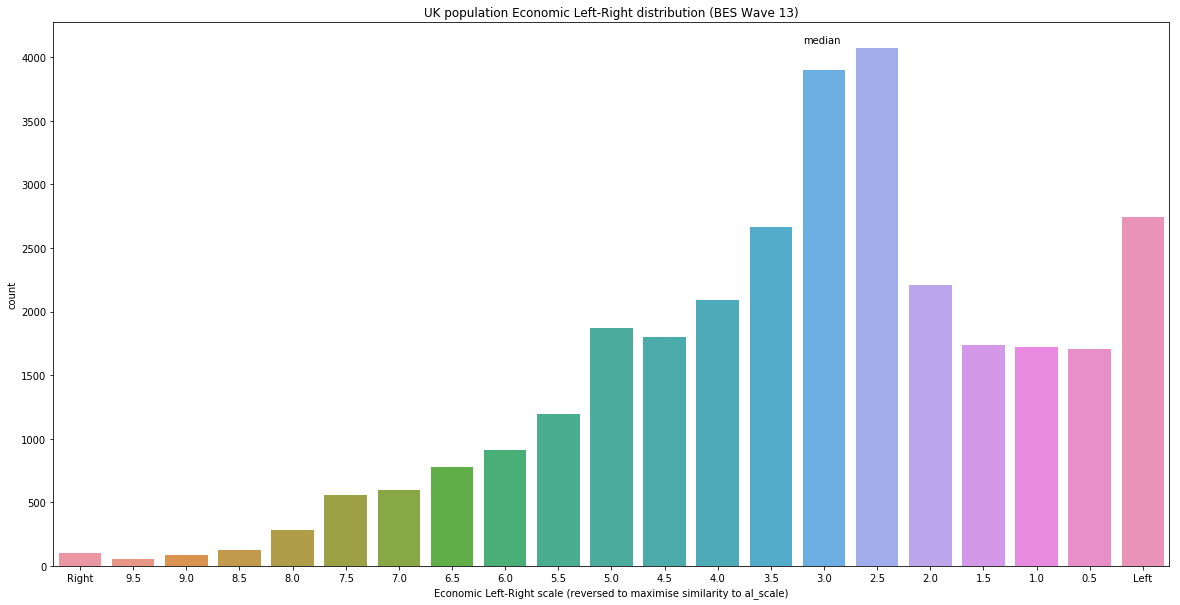

In [207]:
# irritating need to flip to be consistent with lr_scale left->right convention!
fig = plt.figure(figsize=(20,10))
data = lr_scale_manual
sns.countplot(data)#, order=range(20,-1,-1))

# plt.vlines(data.mean(), 0,data.value_counts().max())
# plt.text(data.mean(),data.value_counts().max(),'mean',rotation=45);
plt.text(data.median()-.4,data.value_counts().max()*1.01,'median');

plt.gca().set_xticklabels(lr_axis_labels);
plt.xlabel("Economic Left-Right scale (reversed to maximise similarity to al_scale)")
plt.title("UK population Economic Left-Right distribution (BES Wave 13)")
plt.savefig(save_folder + "lr_scale_population"+".png")

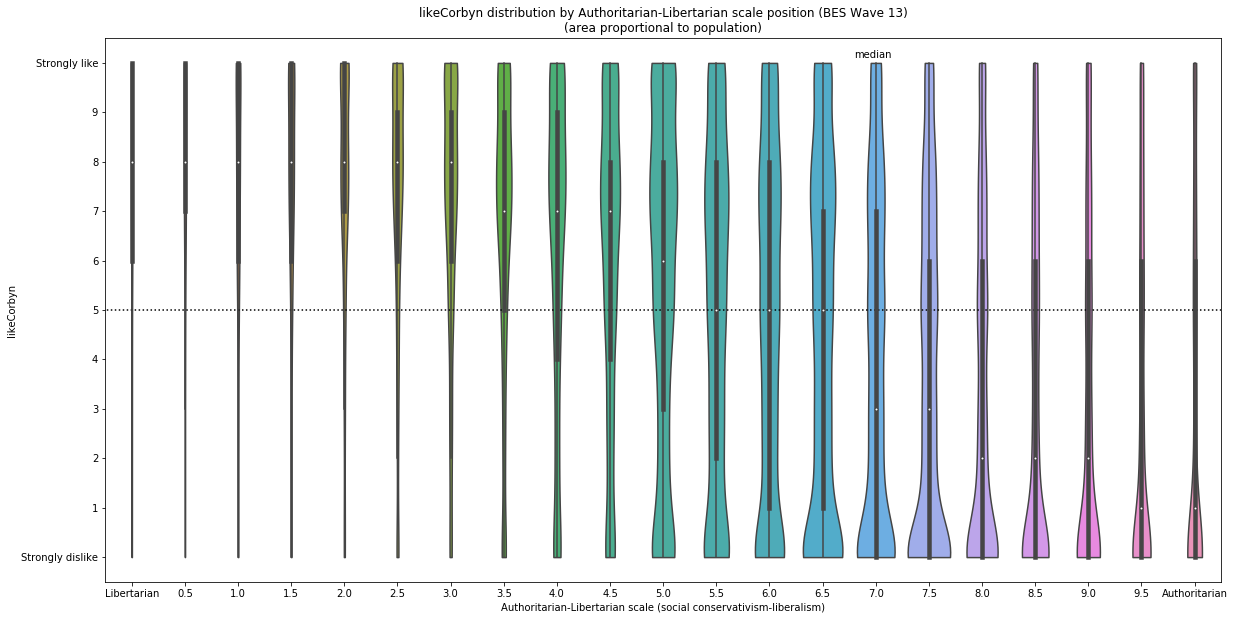

In [208]:
fig = plt.figure(figsize=(20,10))
data_x = al_scale_manual
like_var = "likeCorbyn"
data_y = BES_Panel[like_var].cat.codes.replace(11,np.nan)
sns.violinplot(x=data_x, y=data_y,cut=0, scale='count');
plt.gca().set_xticklabels(al_axis_labels);
plt.xlabel("Authoritarian-Libertarian scale (social conservativism-liberalism)")
plt.title(like_var+" distribution by Authoritarian-Libertarian scale position (BES Wave 13)\n(area proportional to population)")

plt.yticks(range(0,11),y_axis_labels);
plt.ylabel(like_var);

plt.text(data.median()-.4,data_y.max()*1.01,'median');
plt.hlines(5, -1,21, linestyles='dotted')
plt.savefig(save_folder + "al_scale_by_likeCorbyn"+".png")


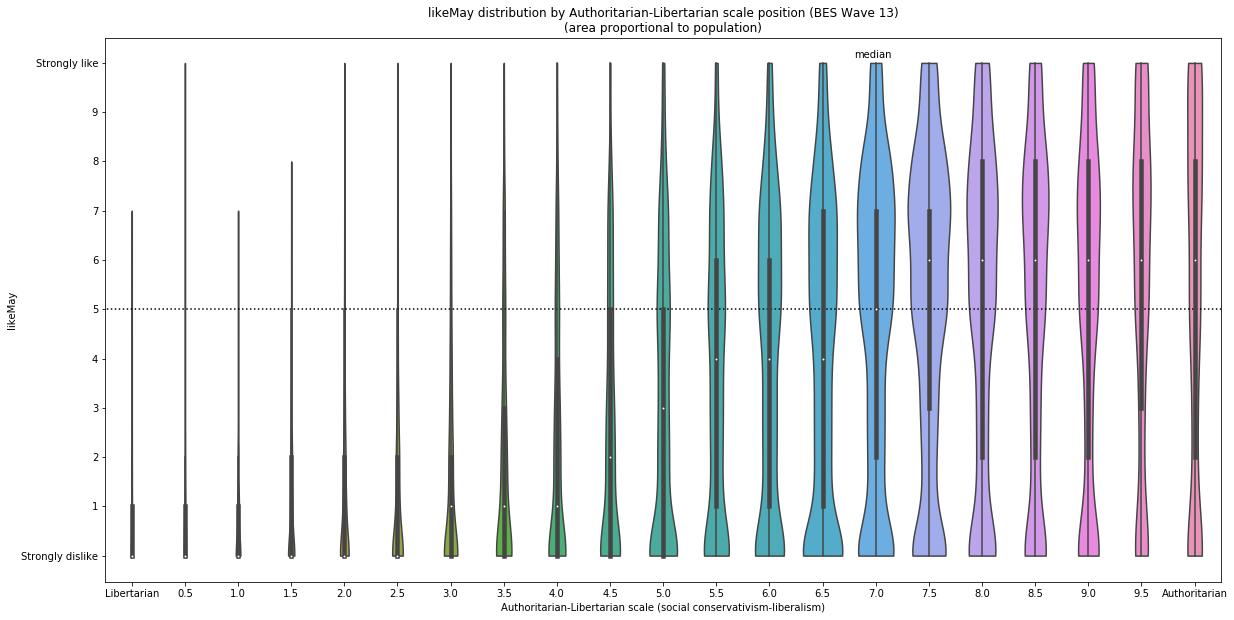

In [209]:
fig = plt.figure(figsize=(20,10))
data_x = al_scale_manual
like_var = "likeMay"
data_y = BES_Panel[like_var].cat.codes.replace(11,np.nan)
sns.violinplot(x=data_x, y=data_y,cut=0, scale='count');
plt.gca().set_xticklabels(al_axis_labels);
plt.xlabel("Authoritarian-Libertarian scale (social conservativism-liberalism)")
plt.title(like_var+" distribution by Authoritarian-Libertarian scale position (BES Wave 13)\n(area proportional to population)")

plt.yticks(range(0,11),y_axis_labels);
plt.ylabel(like_var);

plt.text(data.median()-.4,data_y.max()*1.01,'median');
plt.hlines(5, -1,21, linestyles='dotted')

plt.savefig(save_folder + "al_scale_by_likeMay"+".png")

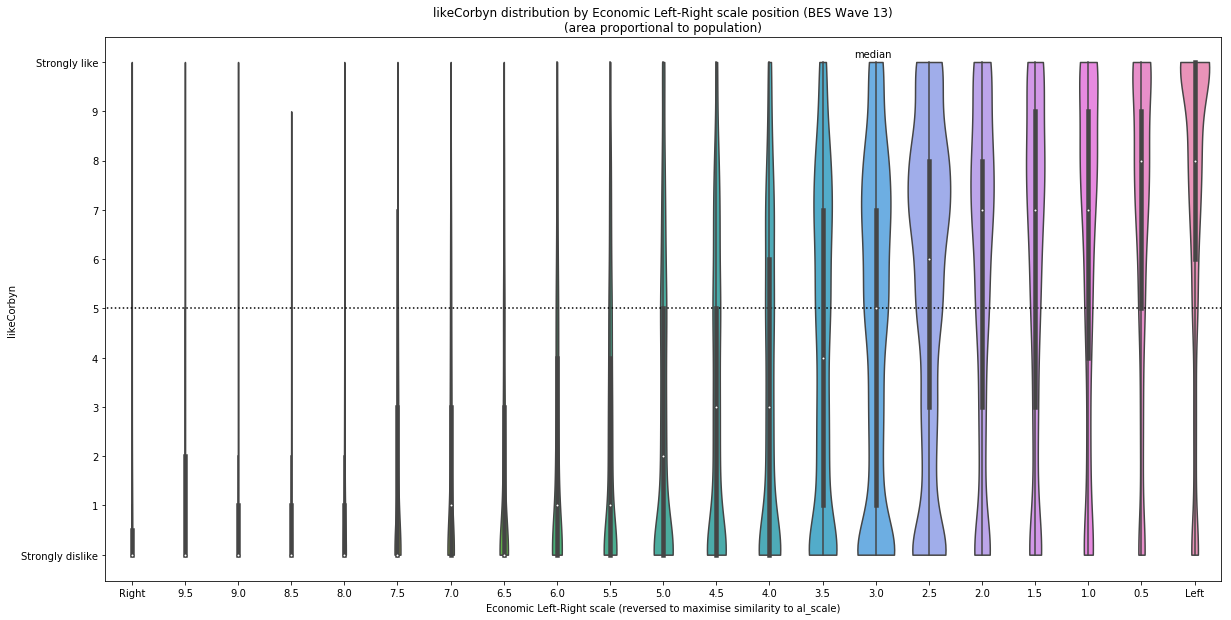

In [210]:
fig = plt.figure(figsize=(20,10))
data_x = lr_scale_manual
like_var = "likeCorbyn"
data_y = BES_Panel[like_var].cat.codes.replace(11,np.nan)
sns.violinplot(x=data_x, y=data_y,cut=0, scale='count');
plt.gca().set_xticklabels(lr_axis_labels);
plt.xlabel("Economic Left-Right scale (reversed to maximise similarity to al_scale)")
plt.title(like_var+" distribution by Economic Left-Right scale position (BES Wave 13)\n(area proportional to population)")

plt.yticks(range(0,11),y_axis_labels);
plt.ylabel(like_var);

plt.text(data.median()-.4,data_y.max()*1.01,'median');
plt.hlines(5, -1,21, linestyles='dotted')

plt.savefig(save_folder + "lr_scale_by_likeCorbyn"+".png")

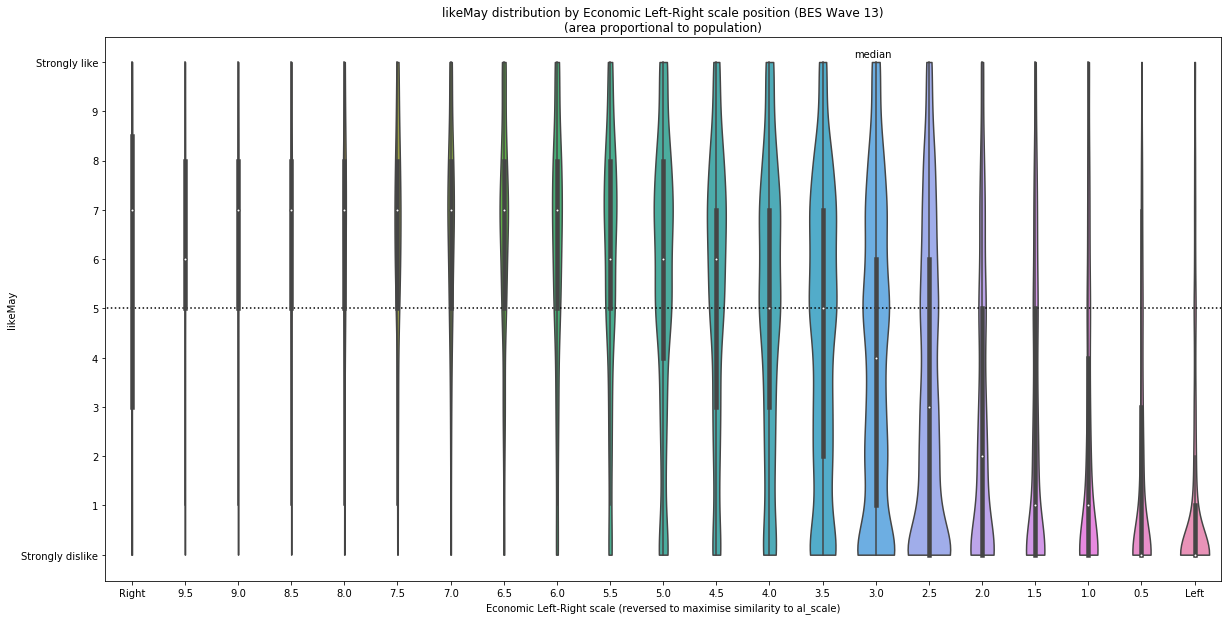

In [212]:
fig = plt.figure(figsize=(20,10))
data_x = lr_scale_manual
like_var = "likeMay"
data_y = BES_Panel[like_var].cat.codes.replace(11,np.nan)
sns.violinplot(x=data_x, y=data_y,cut=0, scale='count');
plt.gca().set_xticklabels(lr_axis_labels);
plt.xlabel("Economic Left-Right scale (reversed to maximise similarity to al_scale)")
plt.title(like_var+" distribution by Economic Left-Right scale position (BES Wave 13)\n(area proportional to population)")

plt.yticks(range(0,11),y_axis_labels);
plt.ylabel(like_var);

plt.text(data.median()-.4,data_y.max()*1.01,'median');
plt.hlines(5, -1,21, linestyles='dotted')

plt.savefig(save_folder + "lr_scale_by_likeMay"+".png")

In [ ]:
## just checking the don't know's

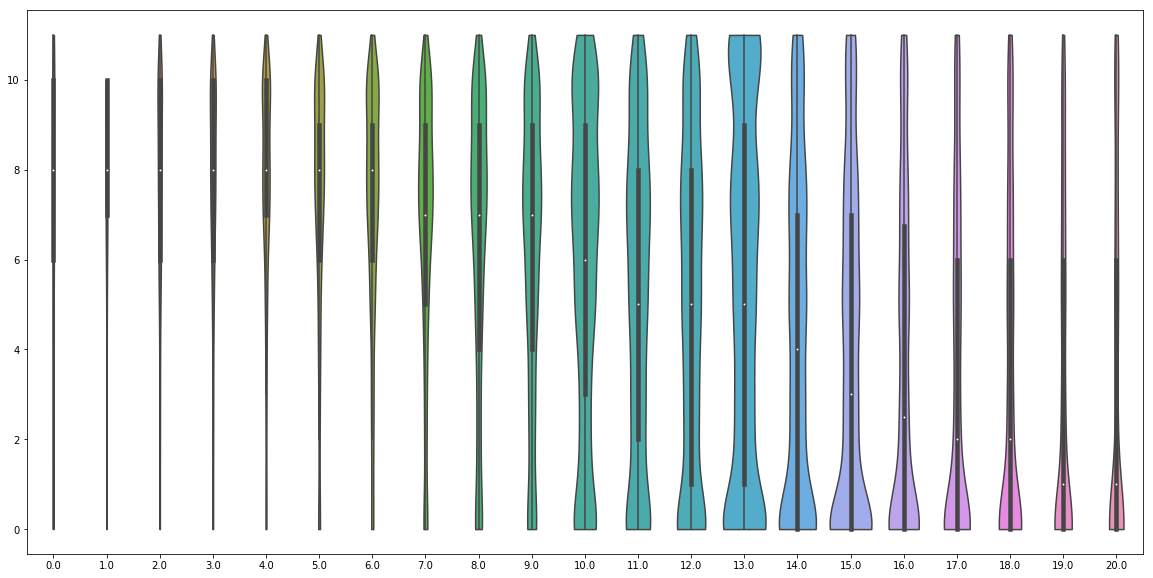

In [98]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x=al_scale_manual, y=BES_Panel["likeCorbyn"].cat.codes,cut=0, scale='count' )

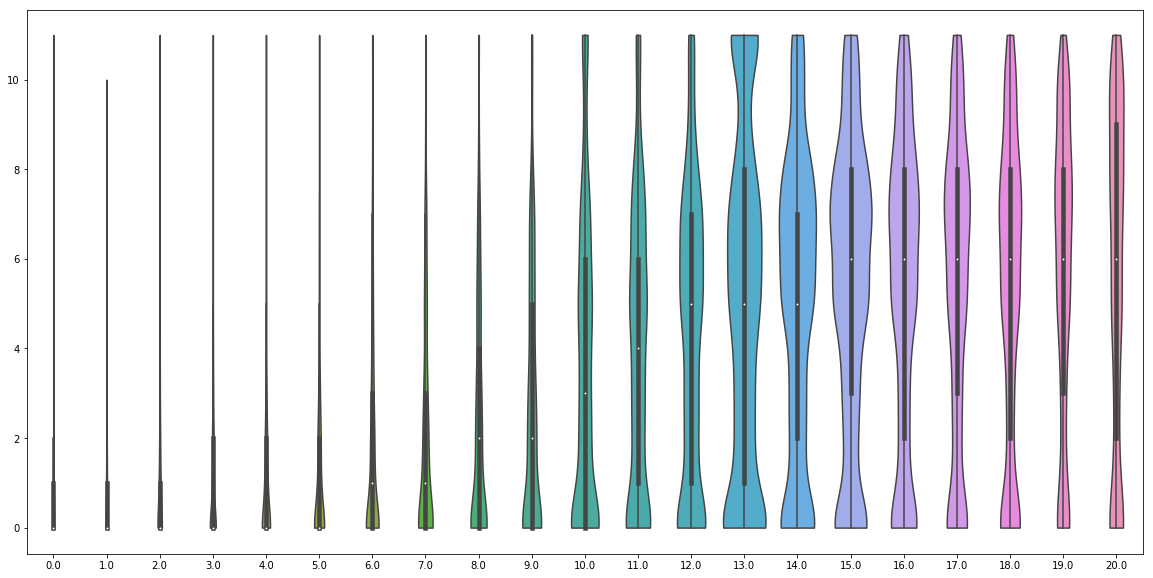

In [99]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x=al_scale_manual, y=BES_Panel["likeMay"].cat.codes,cut=0, scale='count' )

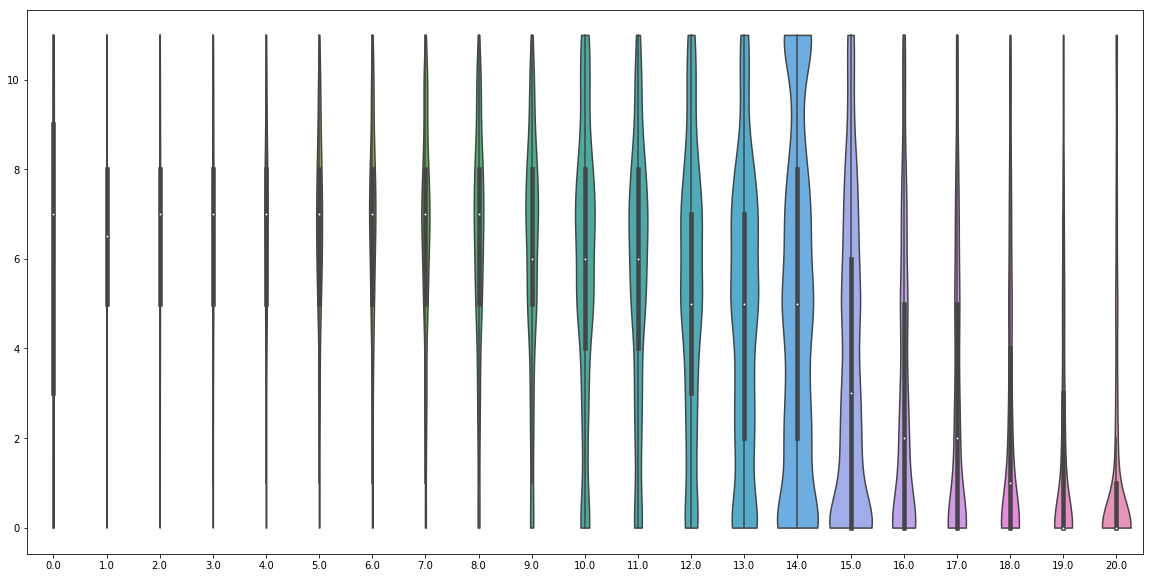

In [96]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x=lr_scale_manual, y=BES_Panel["likeMay"].cat.codes,cut=0, scale='count' )

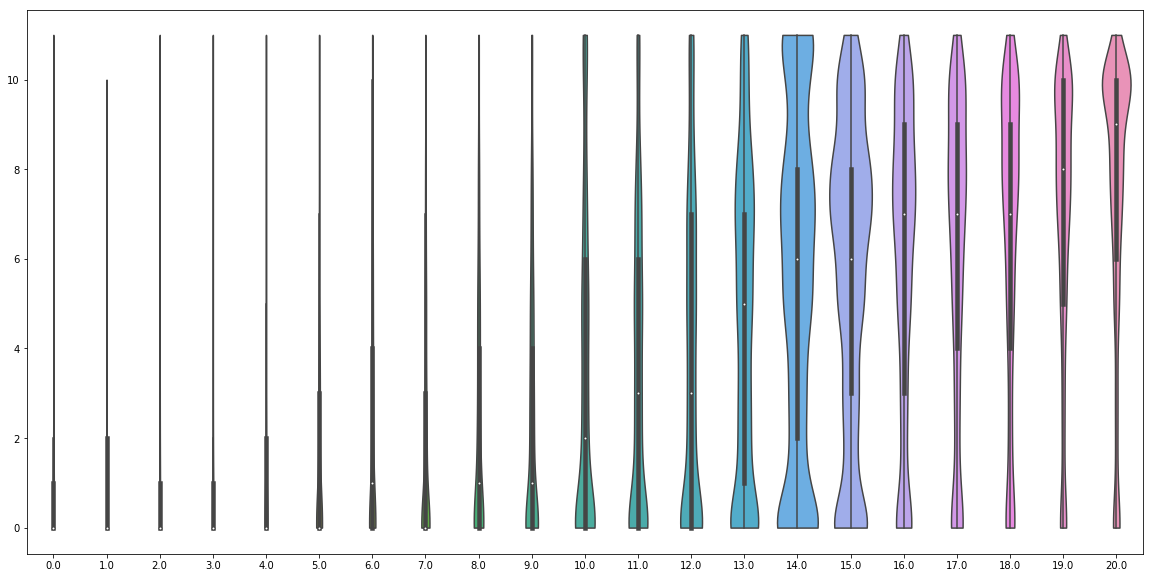

In [97]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x=lr_scale_manual, y=BES_Panel["likeCorbyn"].cat.codes,cut=0, scale='count' )